In [26]:
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [3]:
mnist_train = np.load('data/mnist_train.npy')
X_train = np.load('data/X_train.npy')
y_train = np.load('data/y_train.npy')
mnist_test = np.load('data/mnist_test.npy')
X_test = np.load('data/X_test.npy')
y_test = np.load('data/y_test.npy')

test_p, test_var = np.load("predictions/X_test.npy")
train_p, train_var = np.load("predictions/X_train.npy")

In [4]:
print(test_p.shape)
print(test_var.shape)

(10000, 10)
(10000, 10)


In [5]:
predictions = np.argmax(test_p, axis=-1)
correct_imgs = np.argwhere(predictions == y_test)
incorrect_imgs = np.argwhere(predictions != y_test)
print("Number of missclassifications: {}".format(len(incorrect_imgs)))
print("Accuracy: {}".format(len(correct_imgs)/len(predictions) * 100))

Number of missclassifications: 72
Accuracy: 99.28


In [6]:
top_vars = test_var[np.arange(len(test_var)), predictions]
correct_vars = top_vars[correct_imgs]
incorrect_vars = top_vars[incorrect_imgs]
correct_stds = np.sqrt(correct_vars)
incorrect_stds = np.sqrt(incorrect_vars)

print(len(correct_stds[correct_stds < 0.1]))
print(len(correct_stds[correct_stds < 0.1])/len(correct_stds))

print(len(incorrect_stds[incorrect_stds < 0.1]))
print(len(incorrect_stds[incorrect_stds < 0.1])/len(incorrect_stds))

plt.hist(correct_stds, bins=100)
plt.figure()
plt.xlim([0, 0.1])
plt.hist(correct_stds[correct_stds < 0.1], bins=100)
plt.figure()
plt.hist(incorrect_stds, bins=100, cumulative=False, normed=True);

#TODO draw cummulative top stds.

9729
0.979955680902498
14
0.19444444444444445


In [22]:
def cum_dense_std(xs, stds):
    def y(x):
        return len(stds[stds < x])/len(stds)
    
    return np.array([y(x) for x in xs])

print(correct_stds.max())
print(incorrect_stds.max())
xs = np.linspace(0,0.55, num=1000)
# plt.title("Cumulative distribution of standard deviations")
plt.figure()
plt.plot(xs, cum_dense_std(xs, correct_stds), label="Correctly classified images")
plt.plot(xs, cum_dense_std(xs, incorrect_stds), label="Incorreclty classified images")
plt.legend(loc="lower right")
plt.xlabel("Standard deviation of for the class with highest probability")
plt.ylabel("Cumulative frequency")
plt.savefig("figs/mnist_cum_stds.png", bbox_inches="tight")
plt.show()
plt.figure()

0.499996610361
0.498708894874


In [8]:
%matplotlib
index = incorrect_imgs[4][0]
print(index)
print(y_test[index])
print(predictions[index])
#Plot uncertainty distributions
plt.bar(np.arange(10), test_p[index].squeeze(), yerr=test_var[index].squeeze())

Using matplotlib backend: TkAgg
582
8
2


<Container object of 10 artists>

In [47]:
def draw_image(axes, index):
    ax.imshow(mnist_test[index].reshape(28,28), cmap=plt.cm.gray_r) 
    ax.set_xticks([])
    ax.set_yticks([])

fig = plt.figure()
h = 9
w = 8
for i in range(h):
    for j in range(w):
        k = i * w + j
        index = incorrect_imgs[k][0]
        ax = fig.add_subplot(h, w, k+1)
        draw_image(ax, index)
# fig.savefig("figs/incorrect_mnist", bbox_inches='tight')

# Noisy mnist

In [63]:
def load_data(DATA_DIR):
    rows, cols = 28, 28
    nb_classes = 10

    mat = scipy.io.loadmat(DATA_DIR)
    print(list(mat.keys()))
    X_train = mat['train_x']
    Y_train = np.argmax(mat['train_y'], axis=-1)
    X_test = mat['test_x']
    Y_test = np.argmax(mat['test_y'], axis=-1)
    
    # Reshape and format input
    
    #Renormalize images
    X_train = X_train.astype('float32')
    X_train /= 255.0
    X_test = X_test.astype('float32')
    X_test /= 255.0

    return (X_train, Y_train, X_test, Y_test)

['test_y', '__globals__', '__version__', 'train_y', 'train_x', 'test_x', '__header__']
['test_y', '__globals__', '__version__', 'train_y', 'train_x', 'test_x', '__header__']
['test_y', '__globals__', '__version__', 'train_y', 'train_x', 'test_x', '__header__']


In [85]:
(noisy_nmist_X_train, noisy_nmist_Y_train, noisy_nmist_X_test, noisy_nmist_Y_test) = load_data('data/mnist-with-awgn.mat')

noisy_p, noisy_var = np.load("predictions/noisy_test.npy")
noisy_predictions = np.argmax(noisy_p, axis=-1)
noisy_correct_imgs = np.argwhere(noisy_predictions == noisy_nmist_Y_test)
noisy_incorrect_imgs = np.argwhere(noisy_predictions != noisy_nmist_Y_test)
noisy_top_stds = np.sqrt(noisy_var[np.arange(len(noisy_var)), noisy_predictions])
noisy_correct_stds, noisy_incorrect_stds = noisy_top_stds[noisy_correct_imgs], noisy_top_stds[noisy_incorrect_imgs]
print(len(noisy_correct_imgs)/len(noisy_predictions))

['test_y', '__globals__', '__version__', 'train_y', 'train_x', 'test_x', '__header__']
0.9334


In [87]:
(blur_nmist_X_train, blur_nmist_Y_train, blur_nmist_X_test, blur_nmist_y_test) = load_data('data/mnist-with-motion-blur.mat')

blur_p, blur_var = np.load("predictions/blur_test.npy")
blur_predictions = np.argmax(blur_p, axis=-1)
blur_correct_imgs = np.argwhere(blur_predictions == blur_nmist_y_test)
blur_incorrect_imgs = np.argwhere(blur_predictions != blur_nmist_y_test)
blur_top_stds = np.sqrt(blur_var[np.arange(len(blur_var)), blur_predictions])
blur_correct_stds, blur_incorrect_stds = blur_top_stds[blur_correct_imgs], blur_top_stds[blur_incorrect_imgs]
print(len(blur_correct_imgs)/len(blur_predictions))

['test_y', '__globals__', '__version__', 'train_y', 'train_x', 'test_x', '__header__']
0.9209


In [89]:
(contrast_nmist_X_train, contrast_nmist_y_train, contrast_nmist_X_test, contrast_nmist_y_test) = load_data('data/mnist-with-reduced-contrast-and-awgn.mat')

contrast_p, contrast_var = np.load("predictions/contrast_test.npy")
contrast_predictions = np.argmax(contrast_p, axis=-1)
contrast_correct_imgs = np.argwhere(contrast_predictions == contrast_nmist_y_test)
contrast_incorrect_imgs = np.argwhere(contrast_predictions != contrast_nmist_y_test)
contrast_top_stds = np.sqrt(contrast_var[np.arange(len(contrast_var)), contrast_predictions])
contrast_correct_stds, contrast_incorrect_stds = contrast_top_stds[contrast_correct_imgs], contrast_top_stds[contrast_incorrect_imgs]
print(len(contrast_correct_imgs)/len(contrast_predictions))

['test_y', '__globals__', '__version__', 'train_y', 'train_x', 'test_x', '__header__']
0.7013


9334
666
9209
791
7013
2987


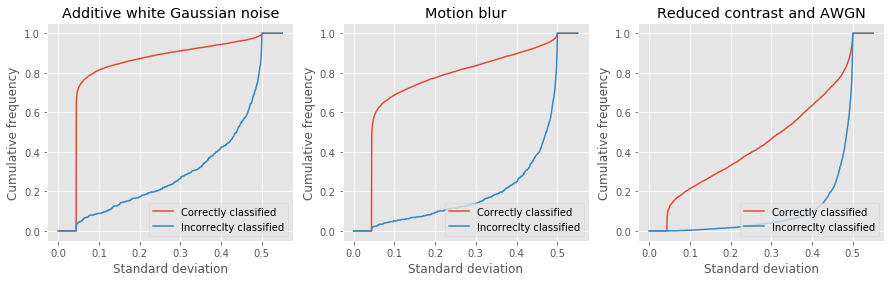

In [103]:
%matplotlib inline
def plot_cum_dense_std(ax, correct_stds, incorrect_stds, title=""):
    def cum_dense_std(xs, stds):
        def y(x):
            return len(stds[stds < x])/len(stds)

        return np.array([y(x) for x in xs])

    print(len(correct_stds))
    print(len(incorrect_stds))
    
    xs = np.linspace(0,0.55, num=1000)
    # plt.title("Cumulative distribution of standard deviations")
    ax.plot(xs, cum_dense_std(xs, correct_stds), label="Correctly classified")
    ax.plot(xs, cum_dense_std(xs, incorrect_stds), label="Incorreclty classified")
    ax.legend(loc="lower right")
    ax.set_xlabel("Standard deviation")
    ax.set_ylabel("Cumulative frequency")
    ax.set_title(title)
    # plt.savefig("figs/mnist_cum_stds.png", bbox_inches="tight")
  
fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
plot_cum_dense_std(ax1, noisy_correct_stds, noisy_incorrect_stds, title="Additive white Gaussian noise")
plot_cum_dense_std(ax2, blur_correct_stds, blur_incorrect_stds, title="Motion blur")
plot_cum_dense_std(ax3, contrast_correct_stds, contrast_incorrect_stds, title="Reduced contrast and AWGN")
plt.savefig("figs/noisy_mnist_cum_stds.png", bbox_inches='tight')

In [73]:
plt.figure()
plt.hist(noisy_correct_stds)
plt.figure()
plt.hist(noisy_incorrect_stds)

(array([ 646.,    3.,    2.,    3.,    2.,    2.,    2.,    2.,    1.,    3.]),
 array([ 0.04353201,  0.08037963,  0.11722726,  0.15407489,  0.19092251,
         0.22777014,  0.26461777,  0.3014654 ,  0.33831302,  0.37516065,
         0.41200828]),
 <a list of 10 Patch objects>)